# 1. 통계 문제

### 문제 1)

- 빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다. 빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다. 그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다. 빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요

가설 설정  
귀무가설(H₀): μ = 500 (식빵의 평균 무게는 500g이다)  
대립가설(H₁): μ ≠ 500 (식빵의 평균 무게는 500g이 아니다)

In [3]:
# 검정 통계량 계산 (t-통계량)
from scipy import stats
import numpy as np

# 데이터 설정
mu_0 = 500  # 목표 모평균
sample_mean = 495 # 표본 평균
sample_std = 10  # 표본 표준편차
n = 25  # 표본 크기
alpha = 0.05  # 유의수준

SE = sample_std / np.sqrt(n) # 표준오차 계산
z_stat = (sample_mean - mu_0) / SE # Z-통계량 계산

df = n-1 # 자유도

p_value = 2 * (1 - stats.t.cdf(abs(z_stat), df=df)) # 양측 검정 p-value 계산

# 결과 출력
print(f"Z-통계량: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# 유의수준 설정
alpha = 0.05
if p_value < alpha:
    print(f"t-값: {z_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {z_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")

Z-통계량: -2.50
P-value: 0.0197
t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

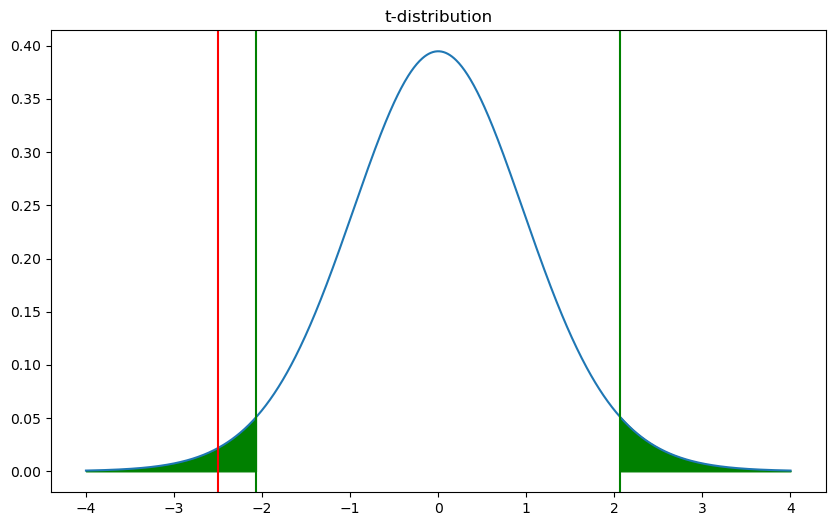

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


t_crit = stats.t.ppf(1 - alpha / 2, df) # 임계값 계산 (양측검정)
# print(t_crit)

x = np.linspace(-4, 4, 1000)
y = stats.t.pdf(x, df)

plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.fill_between(x, y, where=(x <= -t_crit), color='green')
plt.fill_between(x, y, where=(x >= t_crit), color='green')
plt.axvline(z_stat, color='red')
plt.axvline(t_crit, color='green')
plt.axvline(-t_crit, color='green')
plt.title('t-distribution')
plt.show()

### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

In [5]:
sample_scores = [79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78] 


mu_0 = 75
sample_mean = np.mean(sample_scores)
sample_std = np.std(sample_scores, ddof=1)
n = 16
alpha = 0.05

# t-통계량 계산
SE = sample_std / np.sqrt(n)
t_stat = (sample_mean - mu_0) / SE
df = n-1
p_value = 1-stats.t.cdf(t_stat, df=df)

if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

t-값: 6.7890, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.

In [6]:
import numpy as np
from scipy import stats
from scipy.stats import levene

 # H0: 집단의 분산은 동질하다
 # H1: 집단의 분산은 동질하지 않다.

# 그룹 A와 B의 체중 감소량 데이터
group_A = [5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2]
group_B = [4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3]

# 관찰연구에서는 두 개의 그룹을 t검정 할 때 등분산성을 검증한다.
stat, p = levene(group_A, group_B)
equal_var = p >= 0.05 # True
print(f'분산의 동질성 검정통계량: {stat:.3f}')
print(f'분산의 동질성 p- value: {p:.3f} > 0.05 ')


t_stat, p_value = stats.ttest_ind(group_A, group_B, equal_var=equal_var)
alpha = 0.05

if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 다이어트 프로그램은 효과가 없습니다")

분산의 동질성 검정통계량: 1.286
분산의 동질성 p- value: 0.270 > 0.05 
t-값: 6.3898, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 다이어트 프로그램은 효과가 있습니다.


### 문제 5) 대응표본 t검정

<aside>
💡

대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요. 

</aside>

- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.

In [7]:
import numpy as np
from scipy import stats
from scipy.stats import levene

# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

 # H0: 체중 감소에 효과가 없다.
 # H1: 체중 감소에 효과가 없지 않다.

stat, p = levene(before, after)
equal_var = p >= 0.05 # True

t_stat, p_value = stats.ttest_rel(before, after)
alpha = 0.05

if p_value < alpha:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.")
else:
    print(f"t-값: {t_stat:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 고혈압약은 효과가 없습니다.")

t-값: 9.0000, p-value: 0.0000. 유의수준 0.05에서 귀무가설을 기각합니다. 고혈압약은 효과가 있습니다.


### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

In [8]:
# pip install kagglehub

In [9]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")

print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head(3)

Path to dataset files: C:\Users\juwonhee\.cache\kagglehub\datasets\mashlyn\online-retail-ii-uci\versions\3


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [10]:
retail['Country'].unique() # 영국만 있는 데이터가 아니므로 United Kingdom만 추출하는 코드가 필요하다.

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [11]:
import pandas as pd
import numpy as np

data = retail[retail['Country'] == 'United Kingdom']
data['TotalPrice'] = data['Quantity'] * data['Price']
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8


In [24]:
# data['TotalPrice'].mean()

In [31]:
for size in [30, 100, 300]:
    sample = data.sample(size)
    avg_price = sample['TotalPrice'].mean()
    print(f"Sample size: {size}, Mean TotalPrice: {avg_price:.2f}")

print(f"모평균의 평균: {round(data['TotalPrice'].mean(),2)}")

Sample size: 30, Mean TotalPrice: 17.66
Sample size: 100, Mean TotalPrice: 17.95
Sample size: 300, Mean TotalPrice: 16.66
모평균의 평균: 16.69


### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.
- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [35]:
import numpy as np
from scipy import stats
from scipy.stats import t
data = retail[retail['Country'] == 'United Kingdom']
data['TotalPrice'] = data['Quantity'] * data['Price']

# 신뢰 구간 계산 함수
def confidence_interval(data, confidence=0.95):
    _mean = data['TotalPrice'].mean()
    std_err = stats.sem(data['TotalPrice'])
    interval = stats.t.interval(confidence, len(data['TotalPrice'])-1, loc=_mean, scale=std_err)
    return _mean, interval

# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300]
for size in sample_sizes:
    sample = data.sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: {interval}")

Sample size: 30, Mean: 11.88, 95% CI: (6.37841466090658, 17.38425200576009)
Sample size: 100, Mean: 16.09, 95% CI: (11.142955150004974, 21.02784484999502)
Sample size: 300, Mean: 13.34, 95% CI: (11.264027626023802, 15.424439040642865)


샘플 크기가 커짐에 따라 신뢰 구간이 좁아짐을 확인할 수 있다.  
이는 더 많은 데이터가 모집단의 특성을 더 정확하게 반영하기 때문이다.